In [1]:
# Importing the libs
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Defining the fitness function as: -x**2+32*x

def f(x):
  return max(-x**2+32*x, 0)

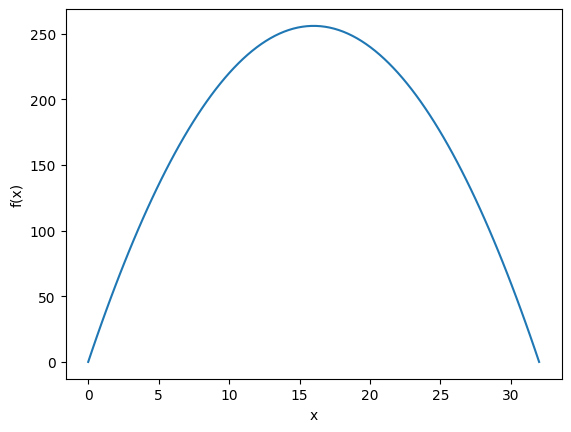

In [3]:
# Create a vector "x" of floats ranging from 0 to 32
x = np.linspace(0, 32, 100)

# Create another vector "y" with the value of the function "f" applied to "x"
y = np.array([f(i) for i in x])

# Plot x and y
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

In [4]:
# Generate the initial population between 0 and 32
init_pop_i = [random.randint(0, 32) for _ in range(5)]
print("Initial population - integers:    ", init_pop_i)

# Convert each integer to its 6-digit binary representation
init_pop_b = [format(number, '06b') for number in init_pop_i]
print("Initial population - binary repr.:",init_pop_b)

# Evaluate population fitness
fit_pop = [f(x) for x in init_pop_i]
print("Population fitness:               ", fit_pop)

# Evaluate population fitness in percentage
s = sum(fit_pop)
fit_pop_p = [format(x/s, '.1%') for x in fit_pop]

print("Population fitness [%]:           ", fit_pop_p)

print("Total fitness:", s)

print("Maximum fitness:", max(fit_pop))

print("Best individual:", init_pop_i[fit_pop.index(max(fit_pop))], '[', init_pop_b[fit_pop.index(max(fit_pop))], ']' )

new_gen_i = init_pop_i
new_gen_b = init_pop_b

Initial population - integers:     [7, 17, 25, 29, 19]
Initial population - binary repr.: ['000111', '010001', '011001', '011101', '010011']
Population fitness:                [175, 255, 175, 87, 247]
Population fitness [%]:            ['18.6%', '27.2%', '18.6%', '9.3%', '26.3%']
Total fitness: 939
Maximum fitness: 255
Best individual: 17 [ 010001 ]


In [5]:
# Select population for mutation

mut_ind = random.randint(0, 4)
mutated_i = new_gen_i[mut_ind]
mutated_b = new_gen_b[mut_ind]

print("Original: ", mutated_i, mutated_b)

mut = random.randint(0, 5)

new_bit = '1' if mutated_b[mut] == '0' else '0'
mutated_b = mutated_b[:mut] + new_bit + mutated_b[mut + 1:]
mutated_i = int(mutated_b, 2)

print("Mutated:  ", mutated_i, mutated_b)

new_gen_i[0] = mutated_i
new_gen_b[0] = mutated_b


Original:  17 010001
Mutated:   19 010011


In [6]:
# Select population for crossover

# Select 2 elements from init_pop with probability from fit_pop

selected_elements = random.choices(new_gen_b, weights=fit_pop, k=2)
#print("Selected elements:", selected_elements)

cross_pos = random.randint(1, 4)
print(cross_pos)

parent1 = selected_elements[0]
parent2 = selected_elements[1]

son1 = selected_elements[0][:cross_pos] + selected_elements[1][cross_pos:]
son2 = selected_elements[1][:cross_pos] + selected_elements[0][cross_pos:]

print("Parents: ", int(parent1, 2), parent1, int(parent2, 2), parent2)
print("Sons:    ", int(son1, 2), son1, int(son2, 2), son2)

3
Parents:  19 010011 17 010001
Sons:     17 010001 19 010011


In [7]:
# Select population for reproduction

# Select 2 elements from init_pop with probability from fit_pop

selected_elements = random.choices(new_gen_i, weights=fit_pop, k=2)
print("Selected elements:", selected_elements)

Selected elements: [19, 25]


In [8]:
# Composing the new generation

new_gen_i[0] = mutated_i
new_gen_b[0] = mutated_b

new_gen_i[1] = selected_elements[0]
new_gen_i[2] = selected_elements[1]

new_gen_i[3] = int(son1, 2)
new_gen_i[4] = int(son2, 2)

new_gen_b = [format(number, '06b') for number in new_gen_i]

print("Population - integers  :", new_gen_i)
print("Population - bin. Repr.:", new_gen_b)

# Evaluate population fitness
fit_pop = [f(x) for x in new_gen_i]
print("Population fitness     :", fit_pop)

# Evaluate population fitness in percentage
s = sum(fit_pop)
fit_pop_p = [format(x/s, '.1%') for x in fit_pop]

print("Population fitness [%] :",fit_pop_p)

print("Maximum fitness:", max(fit_pop))

print("Best individual:", new_gen_i[fit_pop.index(max(fit_pop))], '[', new_gen_b[fit_pop.index(max(fit_pop))], ']' )

Population - integers  : [19, 19, 25, 17, 19]
Population - bin. Repr.: ['010011', '010011', '011001', '010001', '010011']
Population fitness     : [247, 247, 175, 255, 247]
Population fitness [%] : ['21.1%', '21.1%', '14.9%', '21.8%', '21.1%']
Maximum fitness: 255
Best individual: 17 [ 010001 ]


In [9]:
def gen_init_pop():
  # Generate the initial population between 0 and 32
  init_pop_i = [random.randint(0, 32) for _ in range(5)]
  print("Initial population - integers:    ", init_pop_i)

  # Convert each integer to its 6-digit binary representation
  init_pop_b = [format(number, '06b') for number in init_pop_i]
  print("Initial population - binary repr.:",init_pop_b)

  # Evaluate population fitness
  fit_pop = [f(x) for x in init_pop_i]
  print("Population fitness:               ", fit_pop)

  # Evaluate population fitness in percentage
  s = sum(fit_pop)
  fit_pop_p = [format(x/s, '.1%') for x in fit_pop]

  print("Population fitness [%]:           ", fit_pop_p)

  print("Total fitness:", s)

  print("Maximum fitness:", max(fit_pop))

  print("Best initial individual:", init_pop_i[fit_pop.index(max(fit_pop))], '[', init_pop_b[fit_pop.index(max(fit_pop))], ']' )

  new_gen_i = init_pop_i
  new_gen_b = init_pop_b

In [10]:
def mutate():
  # Select population for mutation

  mut_ind = random.randint(0, 4)
  mutated_i = new_gen_i[mut_ind]
  mutated_b = new_gen_b[mut_ind]

  #print("Original: ", mutated_i, mutated_b)

  mut = random.randint(0, 5)

  new_bit = '1' if mutated_b[mut] == '0' else '0'
  mutated_b = mutated_b[:mut] + new_bit + mutated_b[mut + 1:]
  mutated_i = int(mutated_b, 2)

  #print("Mutated:  ", mutated_i, mutated_b)

  new_gen_i[0] = mutated_i
  new_gen_b[0] = mutated_b

In [11]:
def crossover():
  # Select population for crossover

  # Select 2 elements from init_pop with probability from fit_pop

  selected_elements = random.choices(new_gen_b, weights=fit_pop, k=2)
  #print("Selected elements:", selected_elements)

  cross_pos = random.randint(1, 4)
  #print(cross_pos)

  parent1 = selected_elements[0]
  parent2 = selected_elements[1]

  son1 = selected_elements[0][:cross_pos] + selected_elements[1][cross_pos:]
  son2 = selected_elements[1][:cross_pos] + selected_elements[0][cross_pos:]

  #print("Parents: ", int(parent1, 2), parent1, int(parent2, 2), parent2)
  #print("Sons:    ", int(son1, 2), son1, int(son2, 2), son2)

In [12]:
def reprod():
  # Select population for reproduction

  # Select 2 elements from init_pop with probability from fit_pop

  selected_elements = random.choices(new_gen_i, weights=fit_pop, k=2)
  #print("Selected elements:", selected_elements)

In [13]:
def make_new_gen():
  # Composing the new generation

  #new_gen_i[0] = mutated_i
  #new_gen_b[0] = mutated_b

  new_gen_i[1] = selected_elements[0]
  new_gen_i[2] = selected_elements[1]

  new_gen_i[3] = int(son1, 2)
  new_gen_i[4] = int(son2, 2)

  new_gen_b = [format(number, '06b') for number in new_gen_i]

  #print("Population - integers  :", new_gen_i)
  #print("Population - bin. Repr.:", new_gen_b)

  # Evaluate population fitness
  fit_pop = [f(x) for x in new_gen_i]
  #print("Population fitness     :", fit_pop)

  # Evaluate population fitness in percentage
  s = sum(fit_pop)
  fit_pop_p = [format(x/s, '.1%') for x in fit_pop]

  #print("Population fitness [%] :",fit_pop_p)

  #print("Maximum fitness:", max(fit_pop))

  print("Best individual:", new_gen_i[fit_pop.index(max(fit_pop))], '[', new_gen_b[fit_pop.index(max(fit_pop))], ']' )

In [14]:
generations = 10
gen_init_pop()
print()
print("Evolving for", generations, "generations...")
for _ in range(generations):
  mutate()
  crossover()
  reprod()
  make_new_gen()

Initial population - integers:     [30, 2, 13, 7, 31]
Initial population - binary repr.: ['011110', '000010', '001101', '000111', '011111']
Population fitness:                [60, 60, 247, 175, 31]
Population fitness [%]:            ['10.5%', '10.5%', '43.1%', '30.5%', '5.4%']
Total fitness: 573
Maximum fitness: 247
Best initial individual: 13 [ 001101 ]

Evolving for 10 generations...
Best individual: 17 [ 010001 ]
Best individual: 17 [ 010001 ]
Best individual: 17 [ 010001 ]
Best individual: 17 [ 010001 ]
Best individual: 17 [ 010001 ]
Best individual: 17 [ 010001 ]
Best individual: 17 [ 010001 ]
Best individual: 17 [ 010001 ]
Best individual: 17 [ 010001 ]
Best individual: 17 [ 010001 ]
